In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

plt.style.use("default") 
sns.set(font_scale=1.1)

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


## Define Target


In [7]:
target_col = "HeartDisease"

numeric_cols = ["Age", "RestingBP", "Cholesterol", "FastingBS",
                "MaxHR", "Oldpeak"]

categorical_cols = ["Sex", "ChestPainType", "RestingECG",
                    "ExerciseAngina", "ST_Slope"]

print("Target:", target_col)
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Target: HeartDisease
Numeric columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categorical columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [8]:
df[numeric_cols].agg(["min","max","mean","median"]).T

,min,max,mean,median
Age,28.0,77.0,53.510893,54.0
RestingBP,0.0,200.0,132.396514,130.0
Cholesterol,0.0,603.0,198.799564,223.0
FastingBS,0.0,1.0,0.233115,0.0
MaxHR,60.0,202.0,136.809368,138.0
Oldpeak,-2.6,6.2,0.887364,0.6


In [9]:
for i in categorical_cols:
    print(i,df[i].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


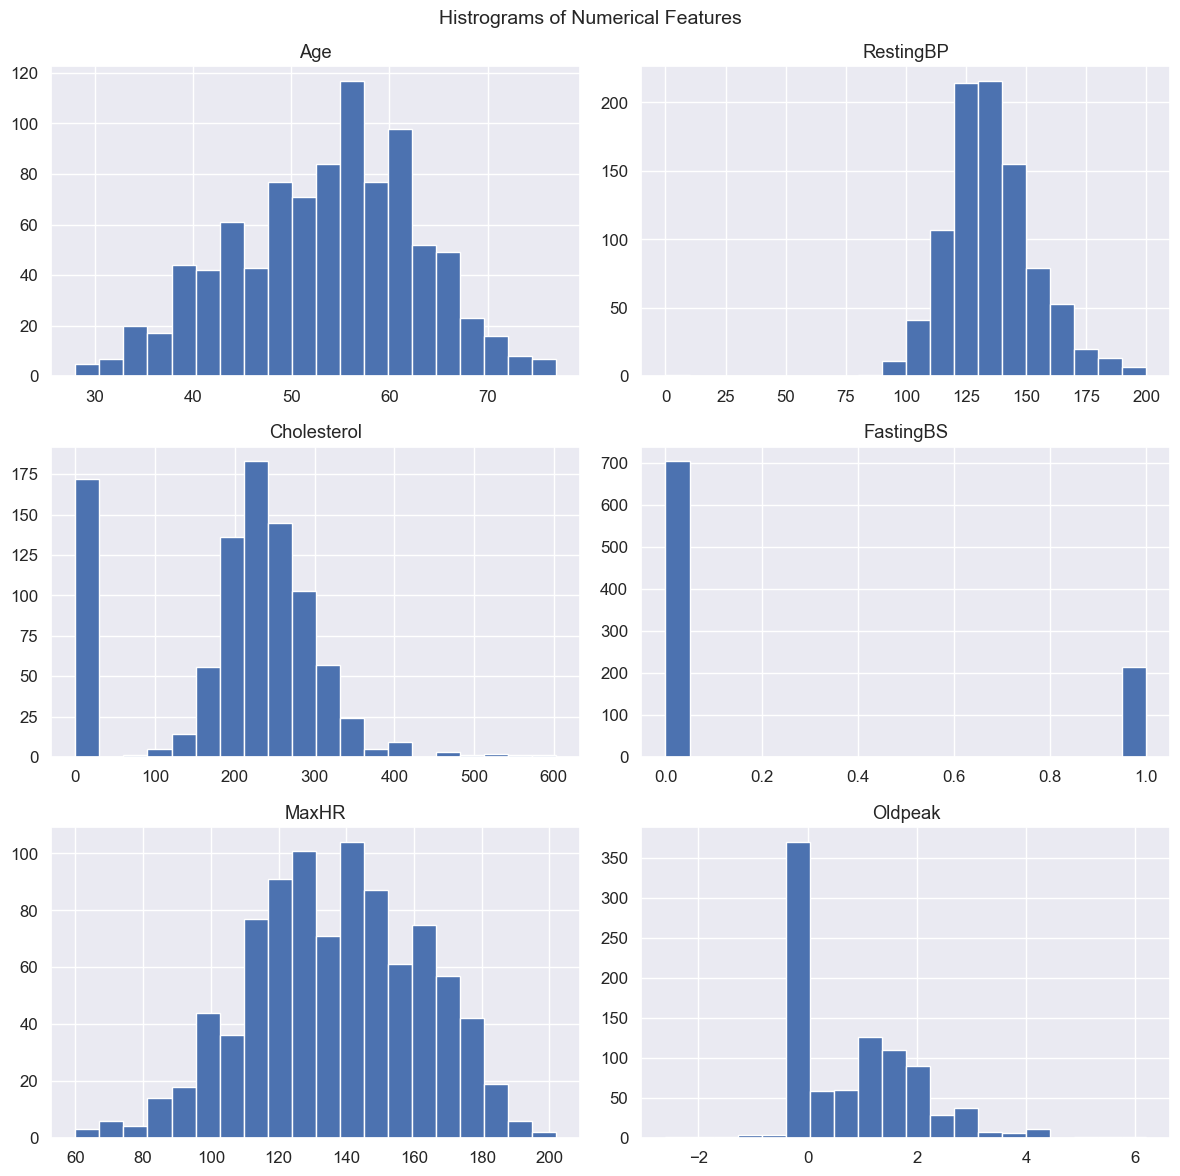

In [10]:
df[numeric_cols].hist(bins=20, figsize=(12,12))
plt.suptitle("Histrograms of Numerical Features", fontsize = 14)
plt.tight_layout()
plt.show()

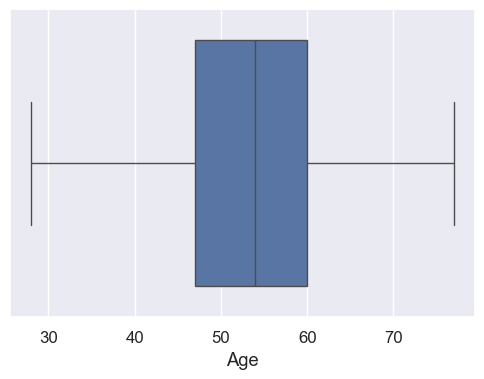

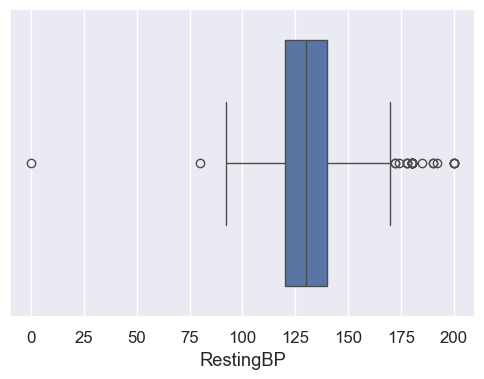

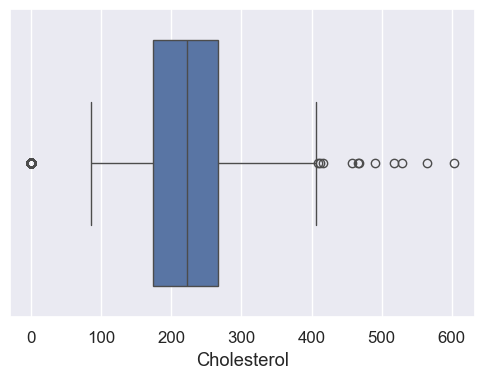

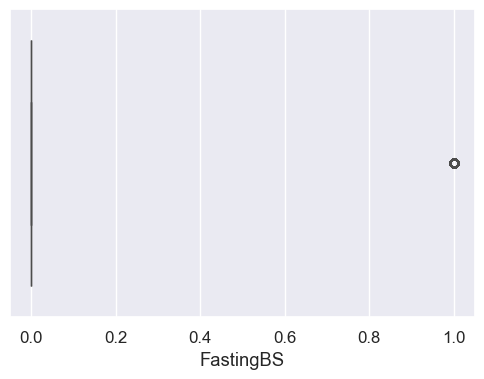

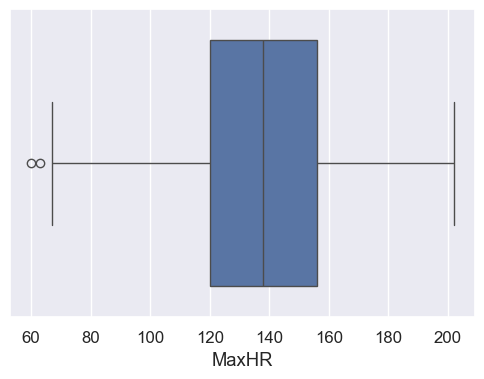

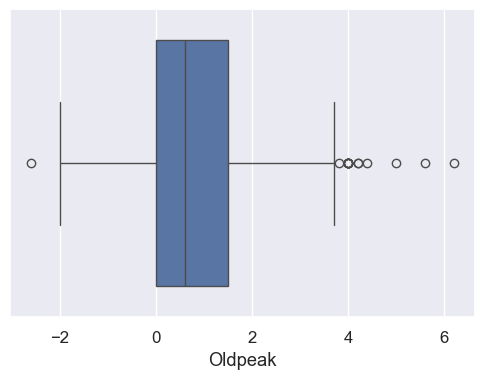

In [11]:
for i in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[i])

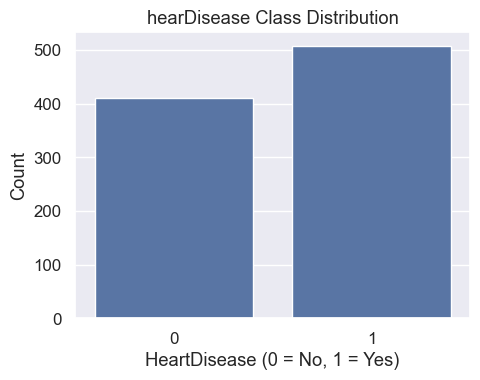

In [12]:
#Target Distribution and Class Imbalance
plt.figure(figsize=(5,4))
sns.countplot(x=df[target_col])
plt.title("hearDisease Class Distribution")
plt.xlabel("HeartDisease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

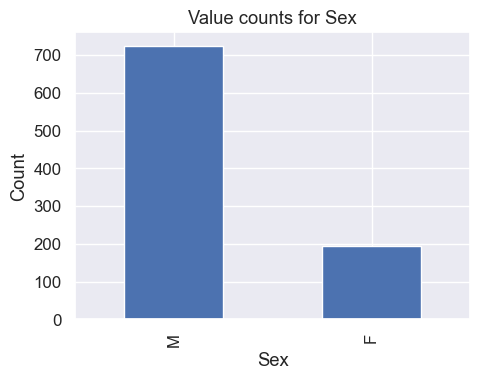

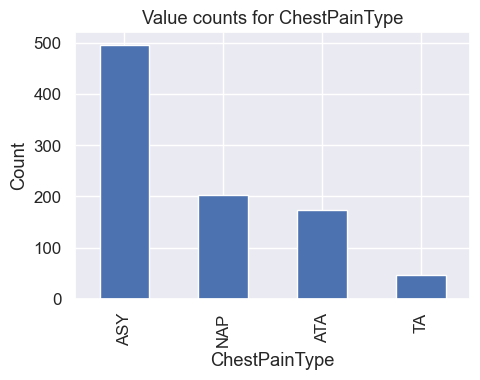

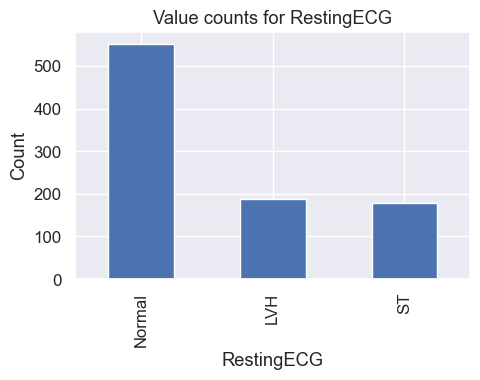

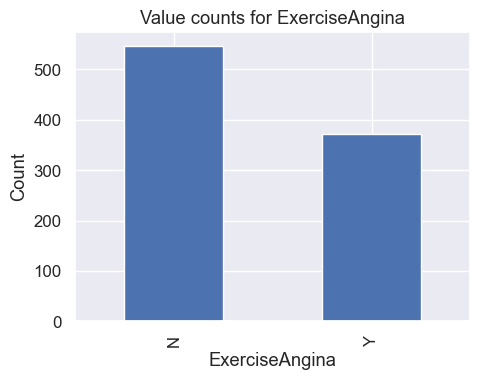

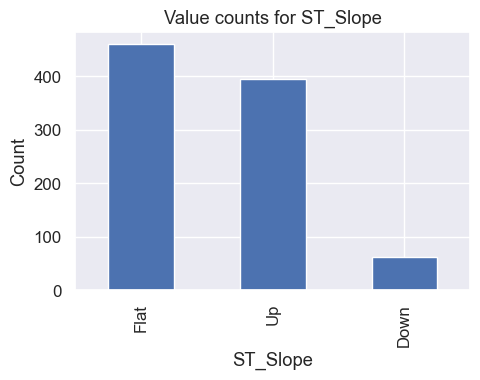

In [13]:
#Categorical Feature Exploration
for c in categorical_cols:
  plt.figure(figsize=(5,4))
  df[c].value_counts().plot(kind="bar")
  plt.title(f"Value counts for {c}")
  plt.ylabel("Count")
  plt.tight_layout()
  plt.show()

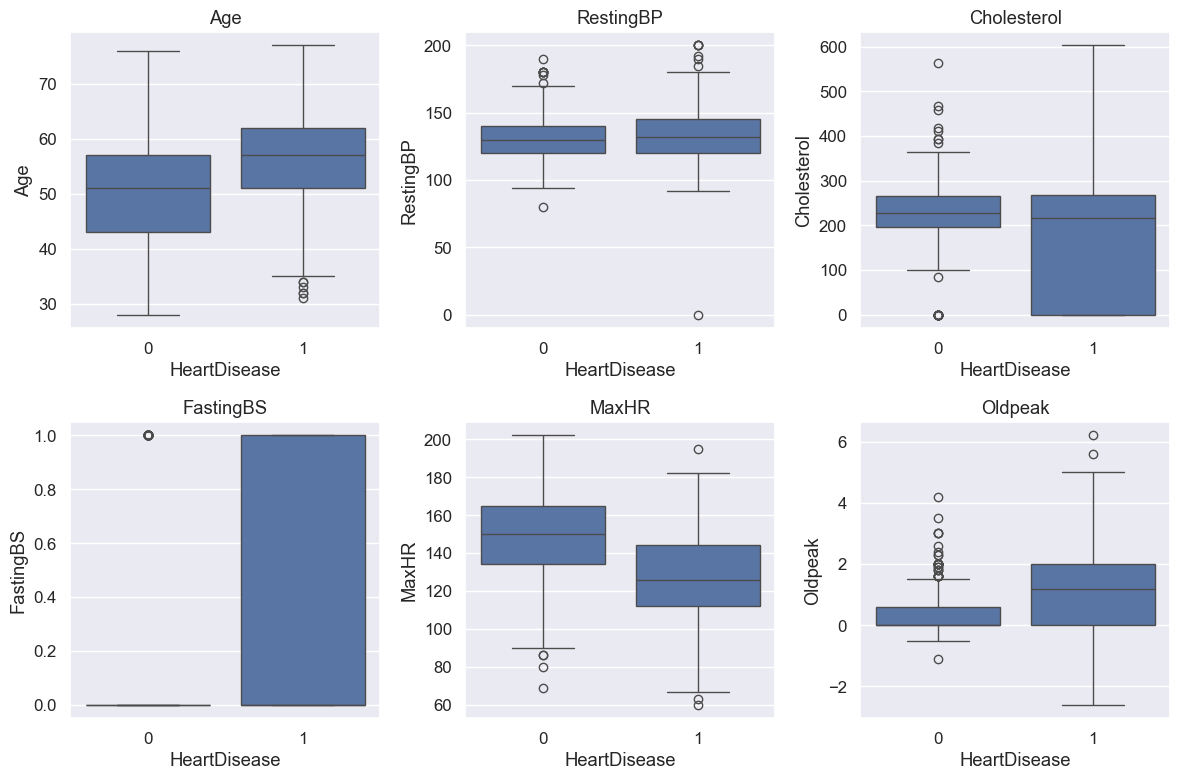

In [14]:
# Boxplots of numeric features split by HeartDisease
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols,1):
  plt.subplot(2,3,i)
  sns.boxplot(x=df[target_col], y = df[col])
  plt.title(col)

plt.tight_layout()
plt.show()

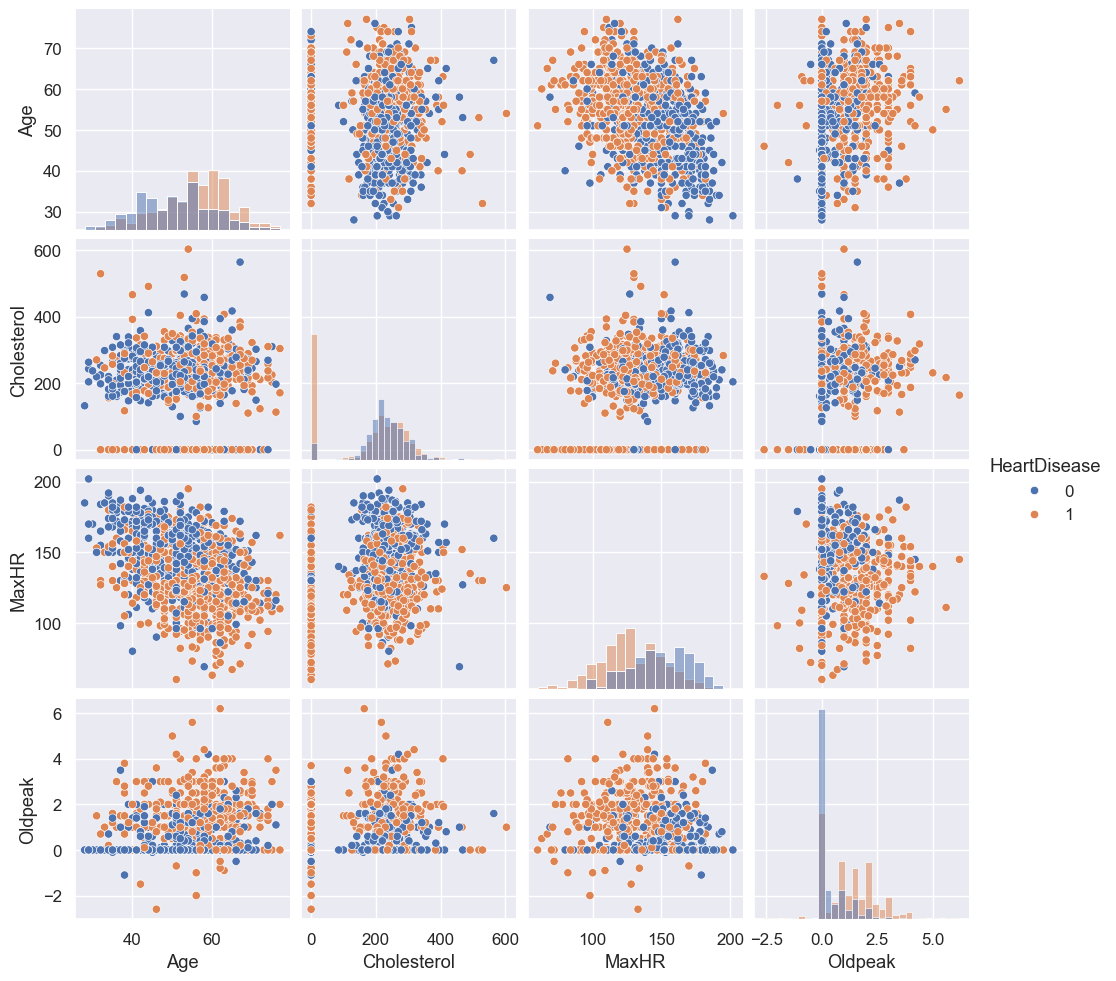

In [15]:
#Pairplot for a Subset of Features
sns.pairplot(df[["Age","Cholesterol","MaxHR", "Oldpeak", "HeartDisease"]],hue="HeartDisease", diag_kind="hist")
plt.show()

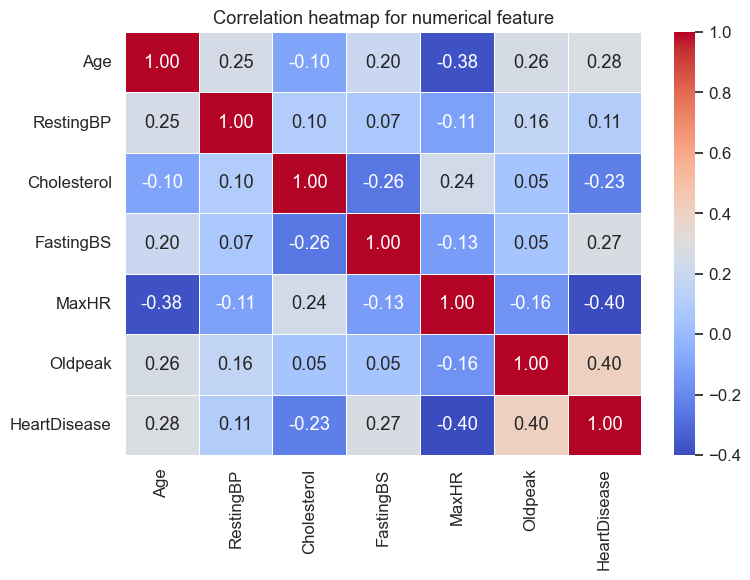

In [18]:
corr_metrix = df[numeric_cols + [target_col]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_metrix,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Correlation heatmap for numerical feature")
plt.tight_layout()
plt.show()